In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

In [72]:
data = list()
tools=["optitype","arcas","rna2hla","hlaforest","seq2hla","hlahd","phlat","hlavbseq",'hlaminer',"T1K"]
for t in tools:
    accuracies = [] #[sbt, ssp, ssop] results for each tool
    for d in range(1,4):
        
        gs=pd.read_csv("../datasets/"+str(d)+"_gs.csv")
        pre=pd.read_csv("../results/standard/"+str(t)+"_d"+str(d)+".csv")
        
        ret=compute_matches(pre,gs[:50]) #only accuracy for first 50 samples of GS 
        ret = np.array(np.sum(ret,axis=1))
        print(t,"d"+str(d),ret)
                
        accuracies.append(ret)
    data.append(accuracies)

print(data)

optitype d1 [  1   2 297]
optitype d2 [0 0 0]
optitype d3 [  6   8 280]
arcas d1 [  3  13 478]
arcas d2 [ 0  4 96]
arcas d3 [  8  59 189]
rna2hla d1 [ 12  12 376]
rna2hla d2 [ 5 14 75]
rna2hla d3 [ 12  21 257]
hlaforest d1 [  9  52 411]
hlaforest d2 [ 1 17 82]
hlaforest d3 [ 20  31 233]
seq2hla d1 [ 21  27 452]
seq2hla d2 [27  9 56]
seq2hla d3 [ 12  21 257]
hlahd d1 [ 28  10 458]
hlahd d2 [ 0  4 96]
hlahd d3 [ 19  65 176]
phlat d1 [ 18  27 383]
phlat d2 [ 0  9 87]
phlat d3 [ 11  30 243]
hlavbseq d1 [232  14 232]
hlavbseq d2 [34  2 46]
hlavbseq d3 [ 31  23 238]
hlaminer d1 [331  57  26]
hlaminer d2 [52 11  9]
hlaminer d3 [207  22  17]
T1K d1 [ 25   4 467]
T1K d2 [ 0  4 96]
T1K d3 [ 22  58 186]
[[array([  1,   2, 297]), array([0, 0, 0]), array([  6,   8, 280])], [array([  3,  13, 478]), array([ 0,  4, 96]), array([  8,  59, 189])], [array([ 12,  12, 376]), array([ 5, 14, 75]), array([ 12,  21, 257])], [array([  9,  52, 411]), array([ 1, 17, 82]), array([ 20,  31, 233])], [array([ 21,  27

In [73]:
data = np.array(data)
sbt = data[:,0]
ssp = data[:,1]
ssop = data[:,2] 

# get accuracies
sbt_accuracy = sbt[:,2]/np.sum(sbt,axis=1)
ssp_accuracy = ssp[:,2]/np.sum(ssp,axis=1)
ssop_accuracy = ssop[:,2]/np.sum(ssop,axis=1)

# append TOTALS
sbttot = np.sum(sbt,axis=0)
ssptot = np.sum(ssp,axis=0)
ssoptot = np.sum(ssop,axis=0)


sbt_accuracy = np.append(sbt_accuracy, sbttot[2]/np.sum(sbttot))
ssp_accuracy = np.append(ssp_accuracy, ssptot[2]/np.sum(ssptot))
ssop_accuracy = np.append(ssop_accuracy, ssoptot[2]/np.sum(ssoptot))


print(ssop_accuracy)



[0.95238095 0.73828125 0.8862069  0.82042254 0.8862069  0.67692308
 0.8556338  0.81506849 0.06910569 0.69924812 0.75162925]


/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_22439/301336337.py:8: RuntimeWarning: invalid value encountered in true_divide
  ssp_accuracy = ssp[:,2]/np.sum(ssp,axis=1)


([<matplotlib.axis.XTick at 0x7fe2e334b1f0>,
 [Text(0, 0, 'optitype'),
  Text(1, 0, 'arcas'),
  Text(2, 0, 'rna2hla'),
  Text(3, 0, 'hlaforest'),
  Text(4, 0, 'seq2hla'),
  Text(5, 0, 'hlahd'),
  Text(6, 0, 'phlat'),
  Text(7, 0, 'hlavbseq'),
  Text(8, 0, 'hlaminer'),
  Text(9, 0, 'T1K'),
  Text(10, 0, 'Total')])

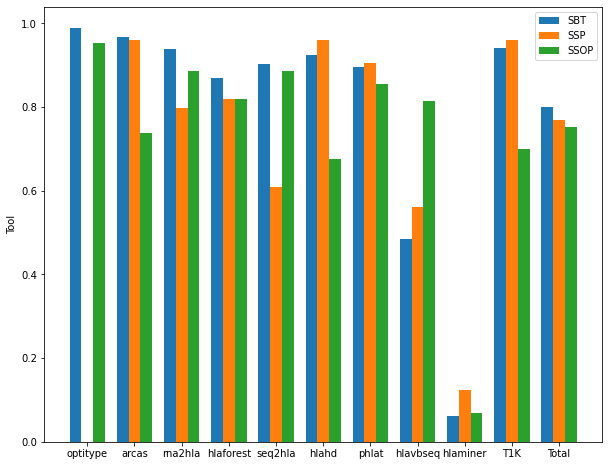

In [91]:
# make a barplot
import matplotlib.pyplot as plt 
import numpy as np 
  
# create data 
x = np.arange(11) 
width = 0.25
  
plt.figure(figsize=(10,8))
    
# plot data in grouped manner of bar type 
plt.bar(x-0.25, sbt_accuracy, width) 
plt.bar(x, ssp_accuracy, width) 
plt.bar(x+0.25, ssop_accuracy, width) 
plt.legend(["SBT","SSP","SSOP"]) 
plt.ylabel("Accuracy")
plt.ylabel("Tool")

plt.xticks(x,["optitype","arcas","rna2hla","hlaforest","seq2hla","hlahd","phlat","hlavbseq",'hlaminer',"T1K", "Total"])